# Titanic EDA Analysis

In [135]:
#Get the Data

In [263]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [264]:
train=sns.load_dataset("titanic")

In [265]:
#Database Informations to understand the size and quality of the data

In [266]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [267]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [268]:
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

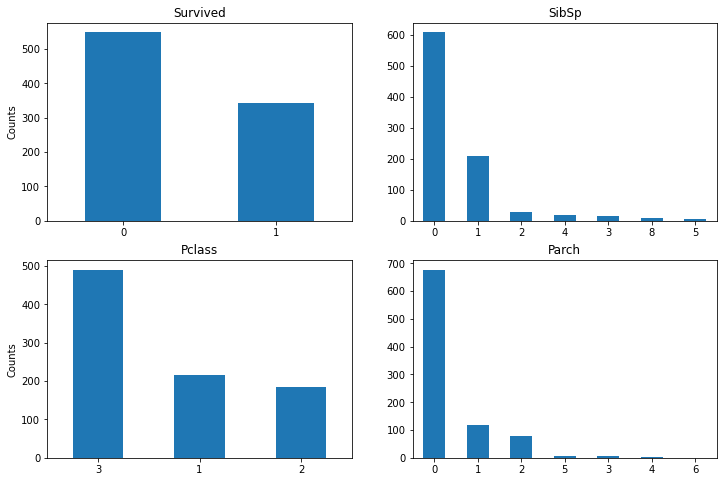

In [270]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
train['survived'].value_counts().plot.bar(ax=ax[0,0], title='Survived')
train['pclass'].value_counts().plot.bar(ax=ax[1,0], title='Pclass')
train['sibsp'].value_counts().plot.bar(ax=ax[0,1], title='SibSp')
train['parch'].value_counts().plot.bar(ax=ax[1,1], title='Parch')
plt.setp(ax[:, 0], ylabel='Counts')
plt.setp(ax[0,0].xaxis.get_majorticklabels(), rotation=360)
plt.setp(ax[1,0].xaxis.get_majorticklabels(), rotation=360)
plt.setp(ax[0,1].xaxis.get_majorticklabels(), rotation=360)
plt.setp(ax[1,1].xaxis.get_majorticklabels(), rotation=360)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

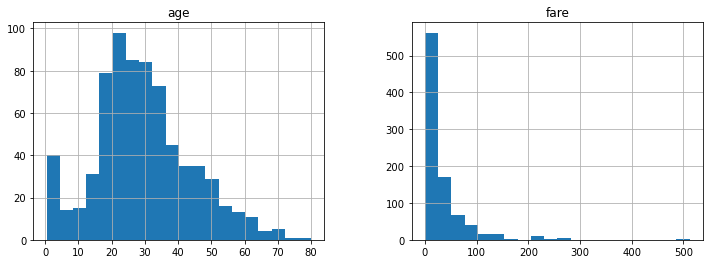

In [272]:
age_fare = train[['age', 'fare']]
age_fare.hist(bins=20, figsize=(12,4))

In [226]:
#Verify if there is some missing values

In [227]:
train.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [228]:
train.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [229]:
train.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [230]:
train.adult_male.value_counts()

True     537
False    354
Name: adult_male, dtype: int64

In [231]:
#The 'adult_male' column is duplicated with the info in the column 'who'. This column can be droped


In [232]:
train.age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [233]:
train.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [234]:
train['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [235]:
# The columns 'pclass' and 'class' have duplicated information. The column 'class' can be droped.

In [236]:
train.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [237]:
train.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [238]:
# The columns 'embarked' and 'embarked_town' have duplicated information. The column 'embarked' can be droped.

In [239]:
train.alive.value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [240]:
train.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [241]:
# The columns ''alive' and 'survived' have duplicated information. The column 'alive' can be droped.

In [242]:
train.alone.value_counts()

True     537
False    354
Name: alone, dtype: int64

In [243]:
(train.parch + train.sibsp).value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
dtype: int64

In [244]:
train.drop('embarked', inplace =True, axis=1)
train.drop('alive', inplace =True, axis=1)
train.drop('adult_male', inplace =True, axis=1)
train.drop('class', inplace =True, axis=1)


In [245]:
#When the sum of the columns 'parch' and 'sibsp' is 0, the value of 'alone' is to True 

In [246]:
train.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [247]:
train.loc[(train['who'] == 'child')]

,survived,pclass,sex,age,sibsp,parch,fare,who,deck,embark_town,alone
7,0,3,male,2.00,3,1,21.0750,child,NaN,Southampton,False
9,1,2,female,14.00,1,0,30.0708,child,NaN,Cherbourg,False
10,1,3,female,4.00,1,1,16.7000,child,G,Southampton,False
14,0,3,female,14.00,0,0,7.8542,child,NaN,Southampton,True
16,0,3,male,2.00,4,1,29.1250,child,NaN,Queenstown,False
...,...,...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,18.7500,child,NaN,Southampton,False
850,0,3,male,4.00,4,2,31.2750,child,NaN,Southampton,False
852,0,3,female,9.00,1,1,15.2458,child,NaN,Cherbourg,False
869,1,3,male,4.00,1,1,11.1333,child,NaN,Southampton,False


In [248]:
train.loc[(train['who'] == 'child')].mean()

C:\Users\MARLEN~1.SIL\AppData\Local\Temp/ipykernel_34884/523691347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.loc[(train['who'] == 'child')].mean()


survived     0.590361
pclass       2.626506
age          6.369518
sibsp        1.734940
parch        1.265060
fare        32.785795
alone        0.072289
dtype: float64

In [249]:
train.loc[(train['who'] == 'man')]

,survived,pclass,sex,age,sibsp,parch,fare,who,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,NaN,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,NaN,Southampton,True
5,0,3,male,NaN,0,0,8.4583,man,NaN,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,man,E,Southampton,True
12,0,3,male,20.0,0,0,8.0500,man,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,man,NaN,Southampton,True
884,0,3,male,25.0,0,0,7.0500,man,NaN,Southampton,True
886,0,2,male,27.0,0,0,13.0000,man,NaN,Southampton,True
889,1,1,male,26.0,0,0,30.0000,man,C,Cherbourg,True


In [250]:
men_avg_age = train.loc[(train['who'] == 'man')].mean()
men_avg_age

C:\Users\MARLEN~1.SIL\AppData\Local\Temp/ipykernel_34884/2276787685.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  men_avg_age = train.loc[(train['who'] == 'man')].mean()


survived     0.163873
pclass       2.372439
age         33.173123
sibsp        0.296089
parch        0.152700
fare        24.864182
alone        0.763501
dtype: float64

In [251]:
women_avg_age = train.loc[(train['who'] == 'woman')].mean()
women_avg_age

C:\Users\MARLEN~1.SIL\AppData\Local\Temp/ipykernel_34884/674478475.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  women_avg_age = train.loc[(train['who'] == 'woman')].mean()


survived     0.756458
pclass       2.084871
age         32.000000
sibsp        0.601476
parch        0.564576
fare        46.570711
alone        0.446494
dtype: float64

In [252]:
# With the obtaining averages for category of 'who' we find that the average for 'man' is 33.2, 'woman' is 32, 'child' is 6.3.

In [253]:
# Now we can fill in the nulls in the 'age' column so as not to delete too much information from the dataset.

In [254]:
train.loc[(train["who"] == "man"), ['age']] = train.loc[(train["who"] == "man"), ['age']].replace(np.nan, round(men_avg_age))
train.loc[(train["who"] == "woman"), ['age']] = train.loc[(train["who"] == "woman"), ['age']].replace(np.nan, round(women_avg_age))

train['embark_town'].value_counts(ascending=True)
train['embark_town'] = train['embark_town'].replace(np.nan, "Southampton")
train['embark_town'].value_counts(ascending=True)

Queenstown      77
Cherbourg      168
Southampton    646
Name: embark_town, dtype: int64

In [255]:
train

,survived,pclass,sex,age,sibsp,parch,fare,who,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,B,Southampton,True
888,0,3,female,32.0,1,2,23.4500,woman,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,C,Cherbourg,True


In [256]:
train.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
who              0
deck           688
embark_town      0
alone            0
dtype: int64

In [290]:
# Graphics analysis

In [258]:
#Let's take a look at the Age distribuition

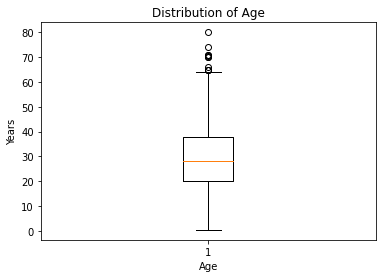

In [276]:
plt.boxplot([train['age'].dropna(axis=0)]) 
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Years');

In [279]:
q_1, q_3 = np.percentile(train['age'].dropna(axis=0), [25, 75])
IQR = q_3 - q_1
upper_bound = q_3 + (1.5 * IQR)
age_outliers = train[train['age'] > upper_bound]
age_outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
456,0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


In [280]:
len(age_outliers)

11

In [282]:
print(np.min(age_outliers['age']))
print(np.max(age_outliers['age']))

65.0
80.0


In [283]:
# We can see on boxplot there are outliers. This is between 65 and 80 years old. We can verify if the youngest people morelikely to survive than oldest people

In [291]:
# In the next grafich we can see the relation between age and survival

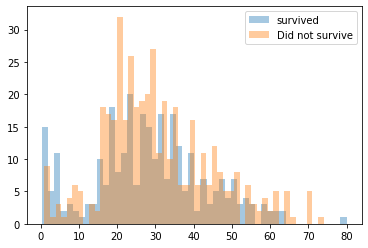

In [285]:
surv = train[train['survived'] == 1]
surv_no = train[train['survived'] == 0]

surv_age = surv['age'].dropna(axis=0)
surv_no_age = surv_no['age'].dropna(axis=0)

plt.hist(surv_age, bins=50, alpha=0.4, label='survived')
plt.hist(surv_no_age, bins=50, alpha=0.4, label='Did not survive')
plt.legend(loc='upper right');

C:\Users\Marlene.Silva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Marlene.Silva\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='survived', ylabel='age'>

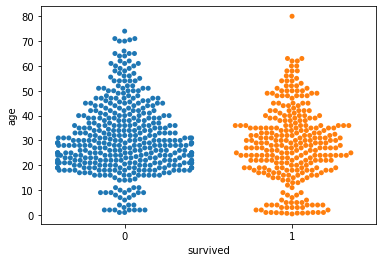

In [289]:
sns.swarmplot(train['survived'],train['age'])

In [ ]:
#Survival was higher for very young children (< 5 years of age). Additionally, there appears to be many young adults (up to about 30 years of age) who did not survive. This can be explained because the old people, women and children have priority to use the rescue boats. Otherwise the distributions are similar.

In [292]:
# In the next graphic we can see the relation between fare and survival

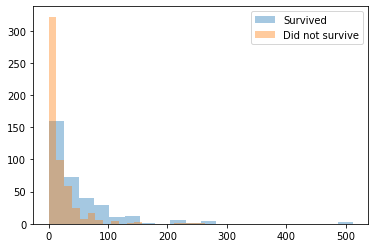

In [286]:
surv = train[train['survived'] == 1]
surv_no = train[train['survived'] == 0]

surv_fare = surv['fare'].dropna(axis=0)
surv_no_fare = surv_no['fare'].dropna(axis=0)

plt.hist(surv_fare, bins=20, alpha=0.4, label='Survived')
plt.hist(surv_no_fare, bins=20, alpha=0.4, label='Did not survive')
plt.legend(loc='upper right');

In [288]:
#There appears to be many low/zero fare entries, particularly for those passengers that did not survive. Maybe the most part of the people that not survided are the workers of the boat. Higher the fare price, more people survived. Maybe the 1st class have priority on the rescue boats as well.

In [294]:
# # In the next graphic we can see the relation between sex and survival

C:\Users\Marlene.Silva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


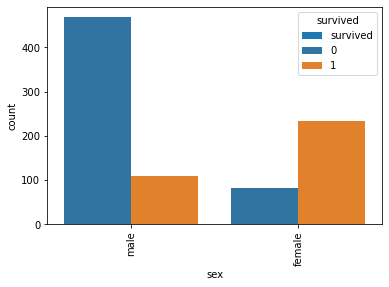

In [295]:
train[['sex','survived']].groupby(['sex']).mean().plot.bar()
sns.countplot('sex',hue='survived',data=train)
plt.show()

C:\Users\Marlene.Silva\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Marlene.Silva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


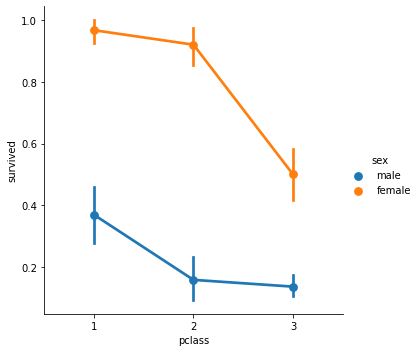

In [175]:
sns.factorplot('pclass', 'survived', hue='sex', data=train)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


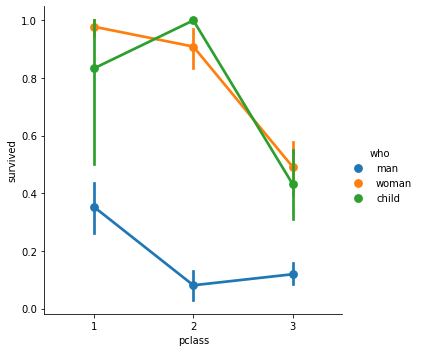

In [225]:
sns.factorplot('pclass', 'survived', hue='who', data=train)
plt.show()

In [246]:
train.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


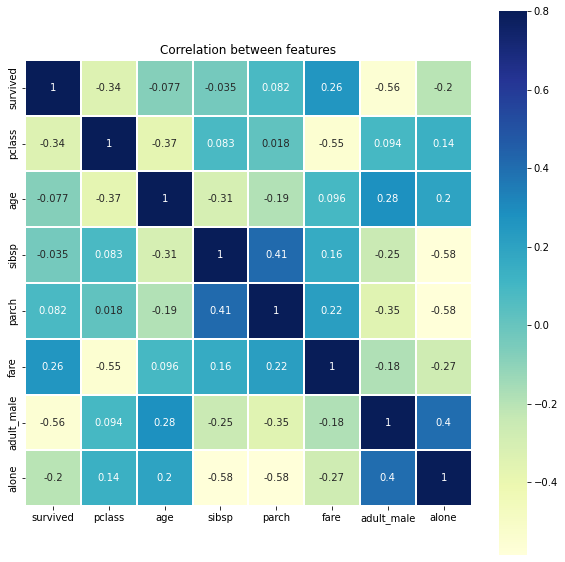

In [251]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [296]:
# We can verify the women and children have a higher number of survivals than males. This can be related with the rescue boats priority in evacuation of the boat.

In [304]:
# Most passengers embarked from Southampton. 

In [ ]:
#Summary the correlations above:

#There is a moderate positive relationship between Survived and Sex. This indicates that females were more likely to survive than males.
#There is a moderate negative relationship between Survived and Pclass. So, passengers in a higher ticket class (e.g., 1st class) were more likely to survive than passengers in a lower ticket class (e.g., third class).
#There is a weak positive relationship between Survived and Fare. So, those that paid more for their ticket were more likely to to survive than those that paid less.